In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import cycle
import numpy as np 
import mplcursors

In [2]:
file_path = r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\SRS_Thesis_ShareFolder\_DATA\_AOIs\_CORNUDAS\_GEOCHEM\CND_ioGAS_SRS.csv'

In [3]:
 df = pd.read_csv(file_path, delimiter=',')

In [4]:
df.head()

Field_ID MountainName Shelbys_Classification Spectral_Classification   
0   CND001   Pinta_East                Caliche             Sedimentary  \
1   CND004   Pinta_East                  Hueco             Sedimentary   
2   CND005   Pinta_East      Nepheline Syenite                 Igneous   
3   CND006   Pinta_East                  Hueco             Sedimentary   
4   CND007   Pinta_East                   Vein             Sedimentary   

         Stratigraphy MapUnit  Lat_WGS84  Long_WGS84  Al_pct_ICP60   
0    Victorio Peak Fm     Pvc   31.88530  -105.43830          0.18  \
1            Hueco Fm      Ph   31.87620  -105.43291          0.08   
2  Tertiary intrusive      Ph   31.87571  -105.43341          8.98   
3            Hueco Fm      Ph   31.87571  -105.43341          0.12   
4            Hueco Fm      Ph   31.88970  -105.44470          0.03   

   Ca_pct_ICP60  ...  MgO_pct_WDX  CaO_pct_WDX  Na2O_pct_WDX  K2O_pct_WDX   
0         23.40  ...        16.34        34.52         -0.01         0.05  \
1          0.11  ...         0.12         0.16          0.25         0.03   
2          0.70  ...         2.14         1.00          5.50         6.11   
3         24.50  ...        16.12        33.69         -0.01         0.02   
4         38.90  ...         0.42        54.72         -0.01        -0.01   

   P2O5_pct_WDX  BaO_pct_WDX  Cr2O3_pct_WDX  SrO_pct_WDX  V2O5_pct_WDX   
0          0.02         0.02          -0.01         0.06         -0.01  \
1         -0.01         0.03           0.02         0.01         -0.01   
2          0.12         0.02          -0.01        -0.01         -0.01   
3          0.01        -0.01          -0.01         0.01         -0.01   
4         -0.01        -0.01          -0.01         0.04         -0.01   

   LOI_pct_WDX  
0        46.08  
1         0.37  
2         2.59  
3        45.13  
4        43.91  

[5 rows x 84 columns]

In [5]:
df_new =  df[['Field_ID', 'Shelbys_Classification', 'Spectral_Classification']]

In [6]:
df_new.head()

Field_ID Shelbys_Classification Spectral_Classification
0   CND001                Caliche             Sedimentary
1   CND004                  Hueco             Sedimentary
2   CND005      Nepheline Syenite                 Igneous
3   CND006                  Hueco             Sedimentary
4   CND007                   Vein             Sedimentary

In [7]:
data_directory = r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\Cornudas_Processed_FieldSpec'

In [8]:
unique_classifications = df_new['Shelbys_Classification'].unique()

# Determine the number of unique classifications
num_colors = len(unique_classifications)

# Create a custom colormap using a built-in matplotlib colormap
cmap = cm.viridis

# Create a dictionary to map each classification to a color from the colormap
classification_colors = {classification: cmap(i / num_colors) for i, classification in enumerate(unique_classifications)}

In [9]:
# Get unique classifications from the DataFrame
unique_classifications = df_new['Shelbys_Classification'].unique()

# Determine the number of unique classifications
num_colors = len(unique_classifications)

# Create a custom colormap using a built-in matplotlib colormap with adjusted spacing
cmap = cm.viridis(np.linspace(0, 1, num_colors))

# Create a dictionary to map each classification to a color from the colormap
classification_colors = {classification: cmap[i] for i, classification in enumerate(unique_classifications)}

In [10]:
from matplotlib.lines import Line2D

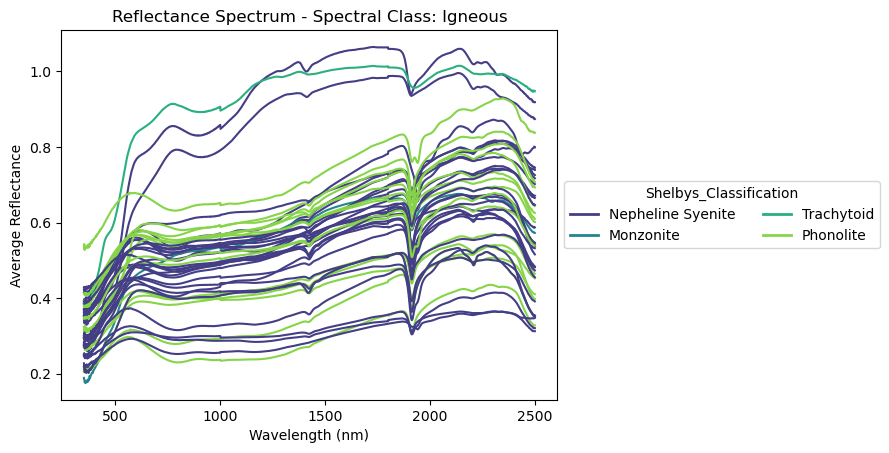

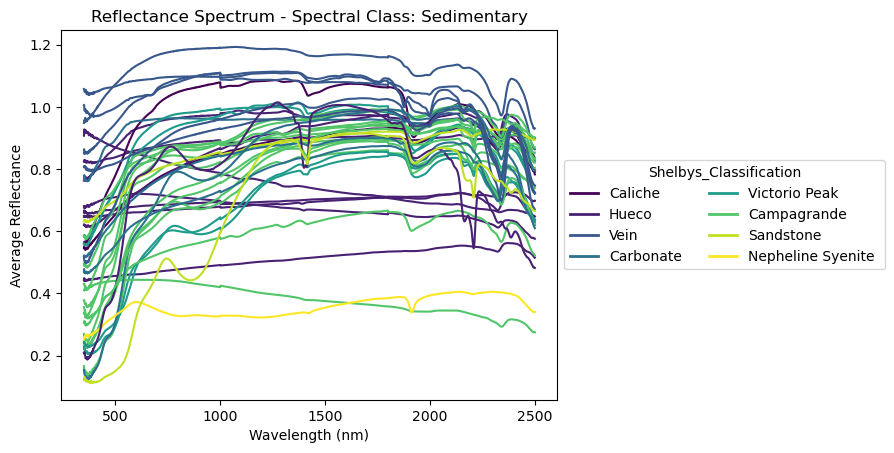

In [13]:
# Group the DataFrame by 'Spectral_Classification'
grouped = df_new.groupby('Spectral_Classification')

# Iterate through each group
for spectral_class, group_data in grouped:
    # Create a new plot for each group
    plt.figure()
    handles = []  # To store custom legend handles
    labels = []   # To store custom legend labels
    
    # Create a dictionary to store legend entries for each Shelbys_Classification
    legend_entries = {}
    
    # Iterate through each unique 'Field_ID' in the group
    for index, row in group_data.iterrows():
        # Construct the file path for the CSV file
        Field_ID = row['Field_ID']
        subdirectory_path = os.path.join(data_directory, Field_ID)
        file_path = os.path.join(subdirectory_path, f'{Field_ID}_Average.csv')
        
        # Check if the file exists
        if os.path.exists(file_path):
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Get the corresponding color for the 'Shelbys_Classification' of the current 'Field_ID'
            color = classification_colors.get(row['Shelbys_Classification'], 'black')
            
            # Plot the data with color based on 'Shelbys_Classification'
            plt.plot(df['Wavelength (nm)'], df['Average Reflectance'], label=Field_ID, color=color)
            
            # Store custom legend handles and labels
            handles.append(Line2D([0], [0], color=color, lw=2))
            labels.append(Field_ID)
            
            # Store legend entry for each Shelbys_Classification
            if row['Shelbys_Classification'] not in legend_entries:
                legend_entries[row['Shelbys_Classification']] = Line2D([0], [0], color=color, lw=2)
    
    # Set plot labels and title
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Average Reflectance')
    plt.title(f'Reflectance Spectrum - Spectral Class: {spectral_class}')
    
    # Create legend with multiple columns
    num_columns = 2  # Number of columns for the legend
    legend_handles = [entry for entry in legend_entries.values()]
    legend_labels = [f"{classification}" for classification in legend_entries.keys()]
    plt.legend(legend_handles, legend_labels, title='Shelbys_Classification', loc='center left', bbox_to_anchor=(1, 0.5), ncol=num_columns)
    
    plt.show()

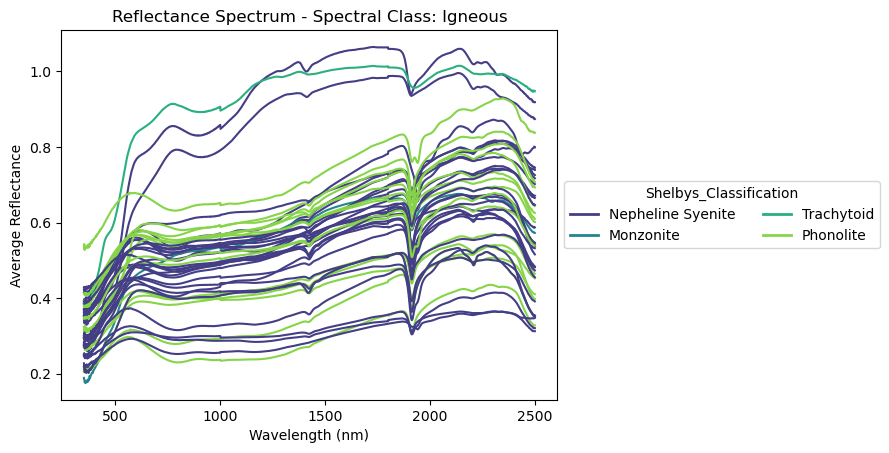

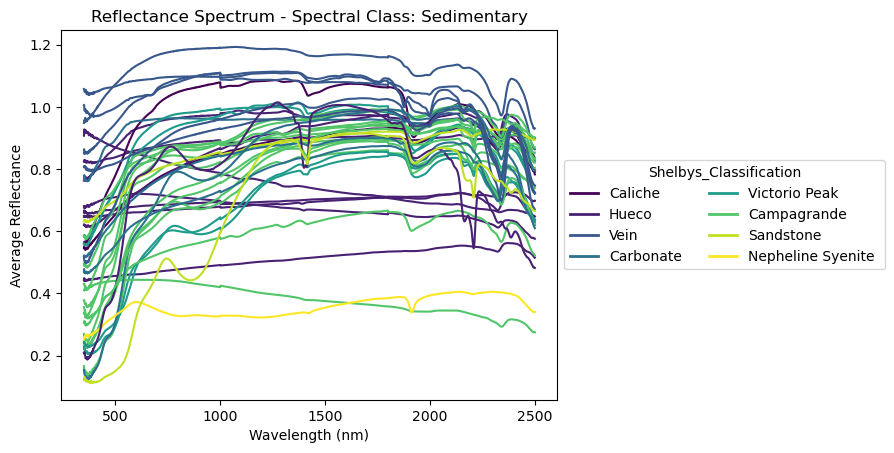

In [14]:
# Group the DataFrame by 'Spectral_Classification'
grouped = df_new.groupby('Spectral_Classification')

# Create a dictionary to store legend handles for each Shelbys_Classification
legend_handles_dict = {}

# Iterate through each group
for spectral_class, group_data in grouped:
    # Create a new plot for each group
    fig, ax = plt.subplots()
    handles = []  # To store custom legend handles
    labels = []   # To store custom legend labels
    
    # Create a dictionary to store legend entries for each Shelbys_Classification
    legend_entries = {}
    
    # Iterate through each unique 'Field_ID' in the group
    for index, row in group_data.iterrows():
        # Construct the file path for the CSV file
        Field_ID = row['Field_ID']
        subdirectory_path = os.path.join(data_directory, Field_ID)
        file_path = os.path.join(subdirectory_path, f'{Field_ID}_Average.csv')
        
        # Check if the file exists
        if os.path.exists(file_path):
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Get the corresponding color for the 'Shelbys_Classification' of the current 'Field_ID'
            color = classification_colors.get(row['Shelbys_Classification'], 'black')
            
            # Plot the data with color based on 'Shelbys_Classification'
            line, = ax.plot(df['Wavelength (nm)'], df['Average Reflectance'], label=Field_ID, color=color)
            
            # Store custom legend handles and labels
            handles.append(line)
            labels.append(Field_ID)
            
            # Store legend entry for each Shelbys_Classification
            if row['Shelbys_Classification'] not in legend_entries:
                legend_entries[row['Shelbys_Classification']] = Line2D([0], [0], color=color, lw=2)
    
    # Set plot labels and title
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Average Reflectance')
    ax.set_title(f'Reflectance Spectrum - Spectral Class: {spectral_class}')
    
    # Create legend with multiple columns
    num_columns = 2  # Number of columns for the legend
    legend_handles = [entry for entry in legend_entries.values()]
    legend_labels = [f"{classification}" for classification in legend_entries.keys()]
    legend = ax.legend(legend_handles, legend_labels, title='Shelbys_Classification', loc='center left', bbox_to_anchor=(1, 0.5), ncol=num_columns)
    
    # Store legend handles in the dictionary
    for handle, label in zip(legend_handles, legend_labels):
        legend_handles_dict[label] = handle
    
    # Function to handle mouse hover event
    def on_hover(event):
        visibility_changed = False
        for handle, label in zip(legend_handles, legend_labels):
            contains, _ = handle.contains(event)
            if contains:
                handle.set_visible(not handle.get_visible())
                visibility_changed = True
        if visibility_changed:
            plt.draw()
    
    # Connect the hover event to the figure
    fig.canvas.mpl_connect('motion_notify_event', on_hover)
    
    plt.show()

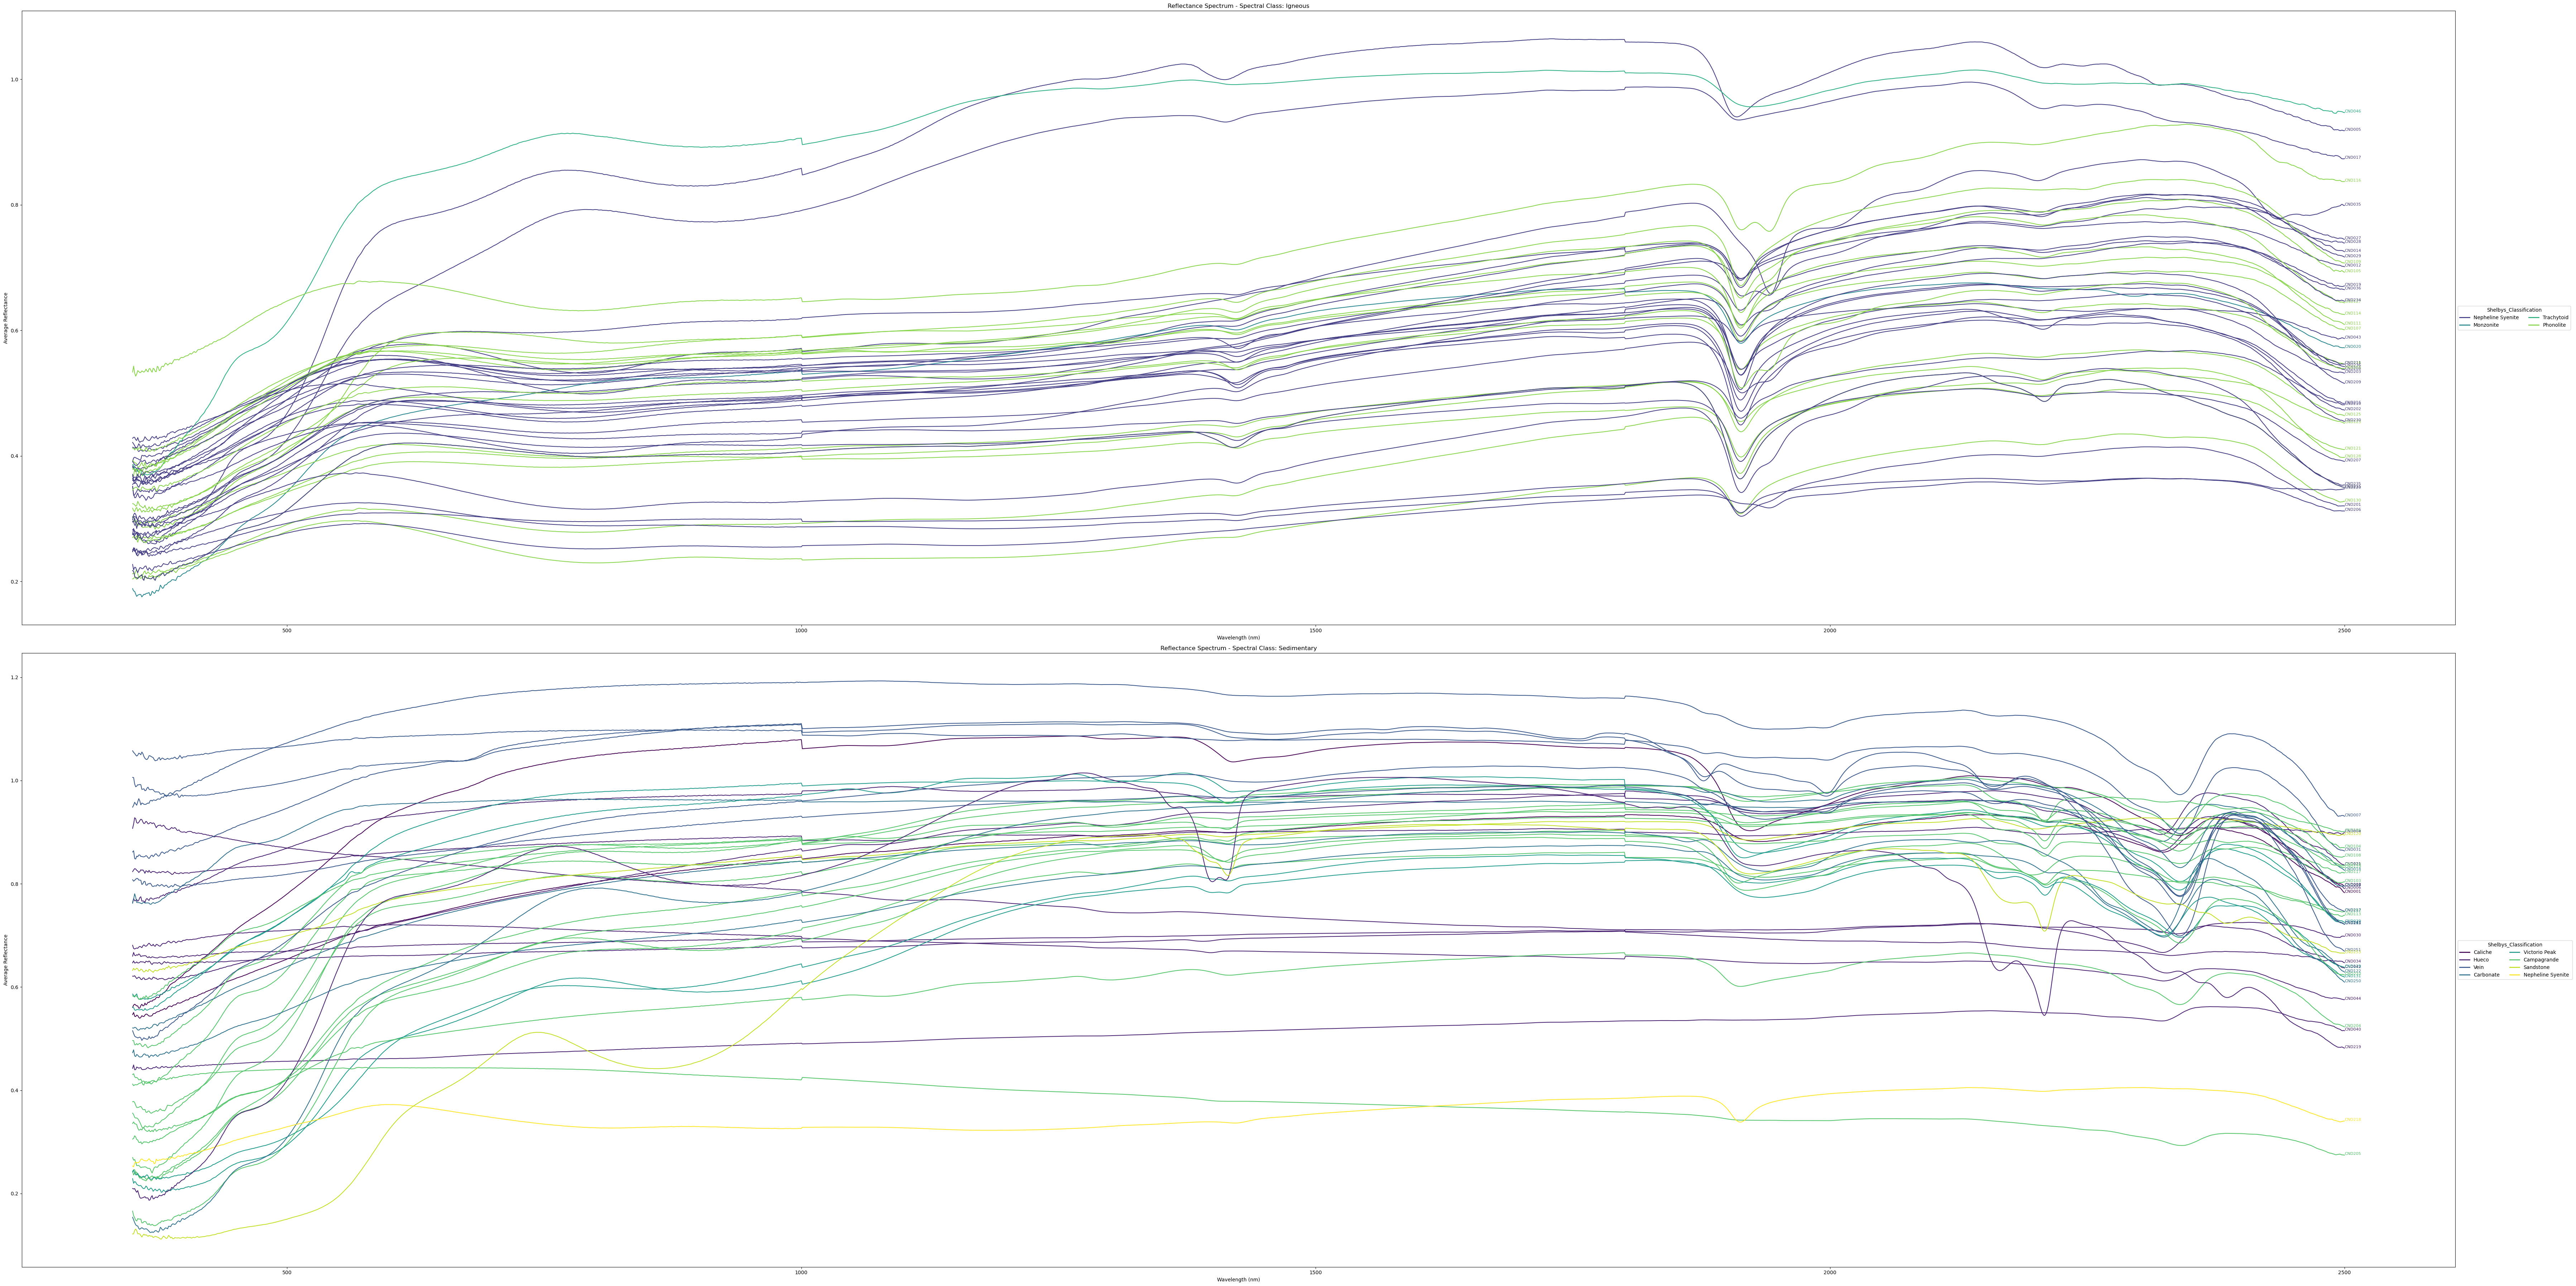

In [24]:
fig = plt.figure(figsize=(72, 36))

# Group the DataFrame by 'Spectral_Classification'
grouped = df_new.groupby('Spectral_Classification')

# Create a dictionary to store legend handles for each Shelbys_Classification
legend_handles_dict = {}

# Iterate through each group
for i, (spectral_class, group_data) in enumerate(grouped, 1):
    ax = fig.add_subplot(len(grouped), 1, i)
    handles = []  # To store custom legend handles
    labels = []   # To store custom legend labels
    
    # Create a dictionary to store legend entries for each Shelbys_Classification
    legend_entries = {}
    
    # Iterate through each unique 'Field_ID' in the group
    for index, row in group_data.iterrows():
        # Construct the file path for the CSV file
        Field_ID = row['Field_ID']
        subdirectory_path = os.path.join(data_directory, Field_ID)
        file_path = os.path.join(subdirectory_path, f'{Field_ID}_Average.csv')
        
        # Check if the file exists
        if os.path.exists(file_path):
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Get the corresponding color for the 'Shelbys_Classification' of the current 'Field_ID'
            color = classification_colors.get(row['Shelbys_Classification'], 'black')
            
            # Plot the data with color based on 'Shelbys_Classification'
            line, = ax.plot(df['Wavelength (nm)'], df['Average Reflectance'], label=Field_ID, color=color)
            
            # Add text annotations for each line
            ax.text(df['Wavelength (nm)'].iloc[-1], df['Average Reflectance'].iloc[-1], Field_ID, fontsize=8, color=color)
            
            # Store custom legend handles and labels
            handles.append(line)
            labels.append(Field_ID)
            
            # Store legend entry for each Shelbys_Classification
            if row['Shelbys_Classification'] not in legend_entries:
                legend_entries[row['Shelbys_Classification']] = Line2D([0], [0], color=color, lw=2)
    
    # Set plot labels and title
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Average Reflectance')
    ax.set_title(f'Reflectance Spectrum - Spectral Class: {spectral_class}')
    
    # Create legend with multiple columns
    num_columns = 2  # Number of columns for the legend
    legend_handles = [entry for entry in legend_entries.values()]
    legend_labels = [f"{classification}" for classification in legend_entries.keys()]
    legend = ax.legend(legend_handles, legend_labels, title='Shelbys_Classification', loc='center left', bbox_to_anchor=(1, 0.5), ncol=num_columns)
    
    # Store legend handles in the dictionary
    for handle, label in zip(legend_handles, legend_labels):
        legend_handles_dict[label] = handle

plt.tight_layout()
plt.show()